In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')

In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.tail()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32559,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [5]:
df.shape

(32560, 15)

**The Census Income dataset comprises 32560 rows and 15 columns, including both numerical and categorical values. Of these, 14 columns represent the independent variables, while one column serves as the target variable. Given that the target variable is categorical, we will employ classification techniques for this project.**

### Data Exploratory Analysis(EDA

In [6]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**From above infomation we can observe that**
- The dataset's index values range from 0 to 32559, covering 32560 rows.
- It includes columns with three distinct data types: Object, and Int.
- Specifically, there is no missing value in columns.

### Checking Null,Nan and other values

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
for i in df.columns:
    print(i,df[i].unique(),'\n')

Age [50 38 53 28 37 49 52 31 42 30 23 32 40 34 25 43 54 35 59 56 19 39 20 45
 22 48 21 24 57 44 41 29 18 47 46 36 79 27 67 33 76 17 55 61 70 64 71 68
 66 51 58 26 60 90 75 65 77 62 63 80 72 74 69 73 81 78 88 82 83 84 85 86
 87] 

Workclass [' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked'] 

Fnlwgt [ 83311 215646 234721 ...  34066  84661 257302] 

Education [' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th'] 

Education_num [13  9  7 14  5 10 12 11  4 16 15  3  6  2  1  8] 

Marital_status [' Married-civ-spouse' ' Divorced' ' Married-spouse-absent'
 ' Never-married' ' Separated' ' Married-AF-spouse' ' Widowed'] 

Occupation [' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Adm-clerical' ' Sales' ' Craft-repair'
 ' Transport-moving' ' Farming-fishing'

**From above we can observe that**
- Analyze the unique values in each column
- Detect special character (?) present in 'Occupation','Workclass' and 'Native_country' columns

In [10]:
df['Occupation']=df['Occupation'].replace(' ?',np.nan)

In [11]:
df['Workclass']=df['Workclass'].replace(' ?',np.nan)

In [12]:
df['Native_country']=df['Native_country'].replace(' ?',np.nan)

We replaced ' ?' character with Nan values 

In [13]:
df.isnull().sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

#### Handling Nan Values

In [14]:
df['Workclass'].fillna(df['Workclass'].mode()[0],inplace=True)

In [15]:
df['Occupation'].fillna(df['Occupation'].mode()[0],inplace=True)

In [16]:
df['Native_country'].fillna(df['Native_country'].mode()[0],inplace=True)

We filled Nan values with the mode 

#### checking duplicate values

In [17]:
df.duplicated().sum()

24

We found 24 is duplicate records so we will delete duplicate values

In [18]:
df.drop_duplicates(inplace=True)

In [19]:
df.shape

(32536, 15)

after removing duplicate record the dataset contain 32536 rows and 15 columns

**Completed Exploratory Data Analysis (EDA), we are now proceeding to the data visualization phase**

### Data Visualization

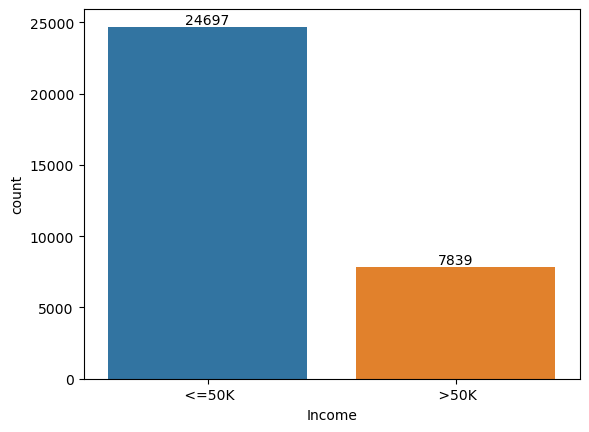

In [20]:
ax=sns.countplot(data=df,x='Income')
for bar in ax.containers:
    ax.bar_label(bar)

From the graph above,it is evident that the count of '<=50K' in Census Income significantly exceeds that of '>=50K'. This indicates a class imbalance issue


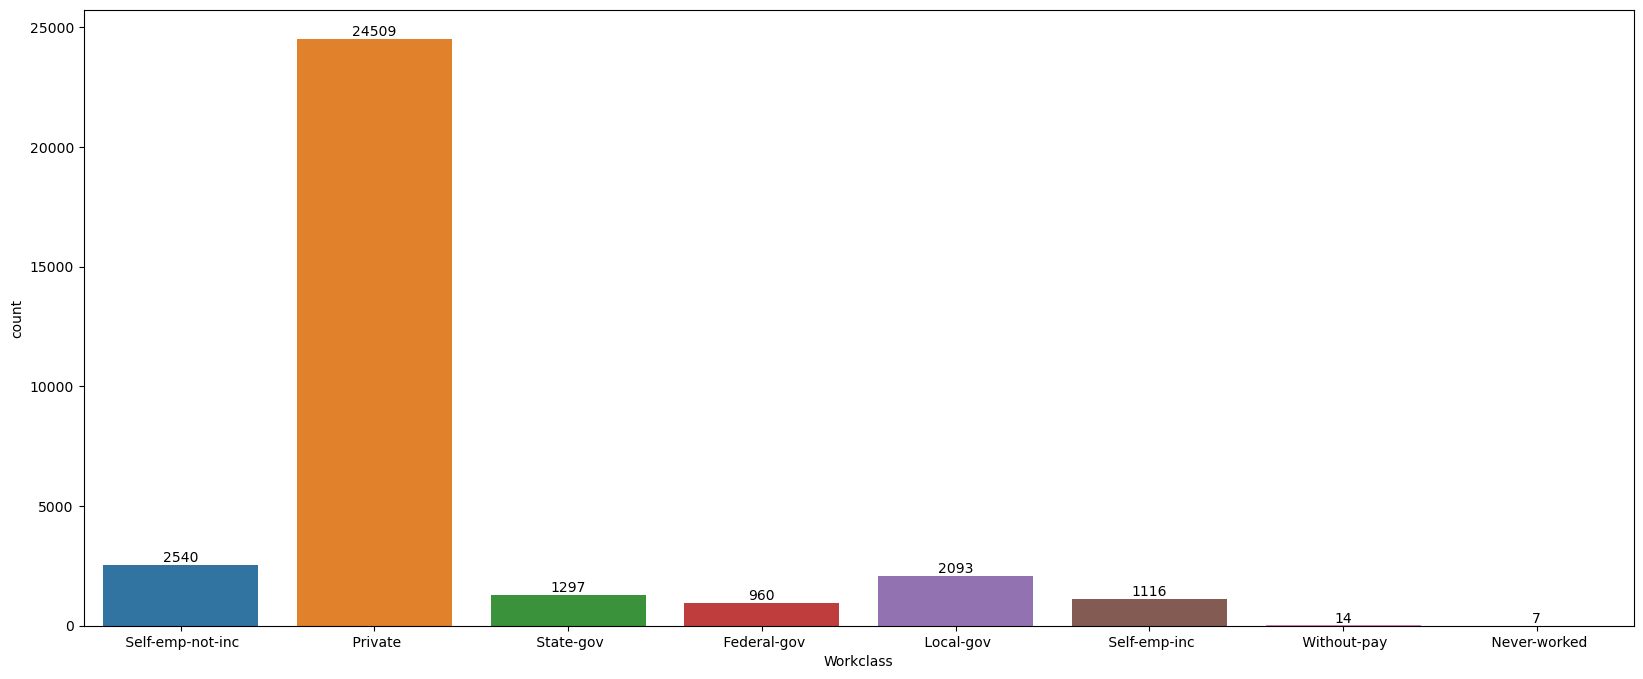

In [21]:
plt.figure(figsize=(20,8))
ax=sns.countplot(data=df,x='Workclass')
for bar in ax.containers:
    ax.bar_label(bar)

1. **Dominance of Private Sector Employment**: The majority of individuals are employed in the private sector, with a count of 24,509. This indicates a significant concentration of the workforce in private companies.

2. **Notable but Smaller Representation of Government Employment**: State government (1,297), federal government (960), and local government (2,093) employment have lower counts compared to the private sector, reflecting a smaller but still significant portion of individuals working in various levels of government.

3. **Limited Self-Employment and Minimal Unpaid Work**: Self-employed individuals who are not incorporated (2,540) and those who are incorporated (1,116) have relatively lower counts. Additionally, there are very few individuals working without pay (14) or who have never worked (7), highlighting minimal representation in these categories.

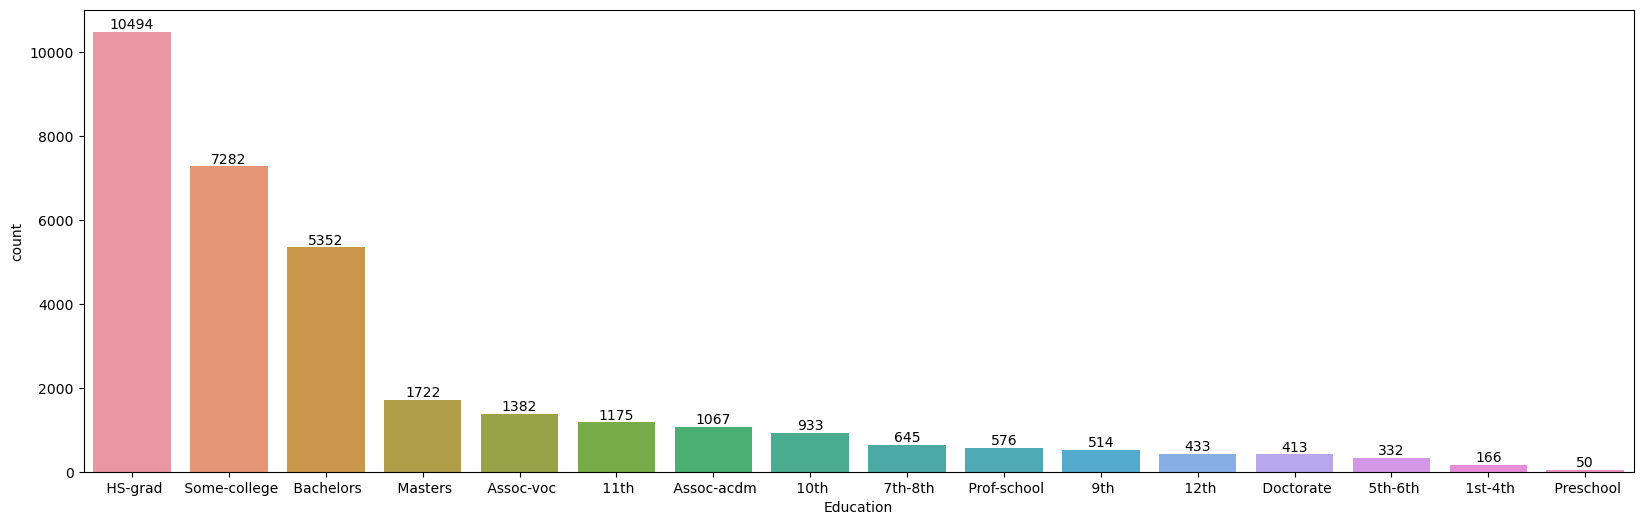

In [22]:
# Count the occurrences of each Education
counts = df['Education'].value_counts().sort_values(ascending=False)

# Plotting the countplot with bars in ascending order
plt.figure(figsize=(20, 6))
ax = sns.countplot(data=df, x='Education', order=counts.index)

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)

1. **High School Graduates Dominate**: The largest group by far consists of high school graduates (HS-grad) with a count of 10,494, indicating that a significant portion of the population has completed high school.

2. **Significant Representation of Some College and Bachelor's Degrees**: Individuals with some college education (7,282) and those with a bachelor's degree (5,352) also form substantial portions of the dataset, highlighting the importance of higher education in the population.

3. **Lower Counts for Advanced and Incomplete Education Levels**: Master's degrees (1,722) and associate degrees (Assoc-voc: 1,382, Assoc-acdm: 1,067) have lower counts, while individuals with education levels below high school (e.g., 9th grade, 10th grade) and advanced degrees like doctorates (413) have relatively small representations. This shows a significant drop-off in educational attainment at both higher and lower ends of the spectrum.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, ' Prof-specialty'),
  Text(1, 0, ' Craft-repair'),
  Text(2, 0, ' Exec-managerial'),
  Text(3, 0, ' Adm-clerical'),
  Text(4, 0, ' Sales'),
  Text(5, 0, ' Other-service'),
  Text(6, 0, ' Machine-op-inspct'),
  Text(7, 0, ' Transport-moving'),
  Text(8, 0, ' Handlers-cleaners'),
  Text(9, 0, ' Farming-fishing'),
  Text(10, 0, ' Tech-support'),
  Text(11, 0, ' Protective-serv'),
  Text(12, 0, ' Priv-house-serv'),
  Text(13, 0, ' Armed-Forces')])

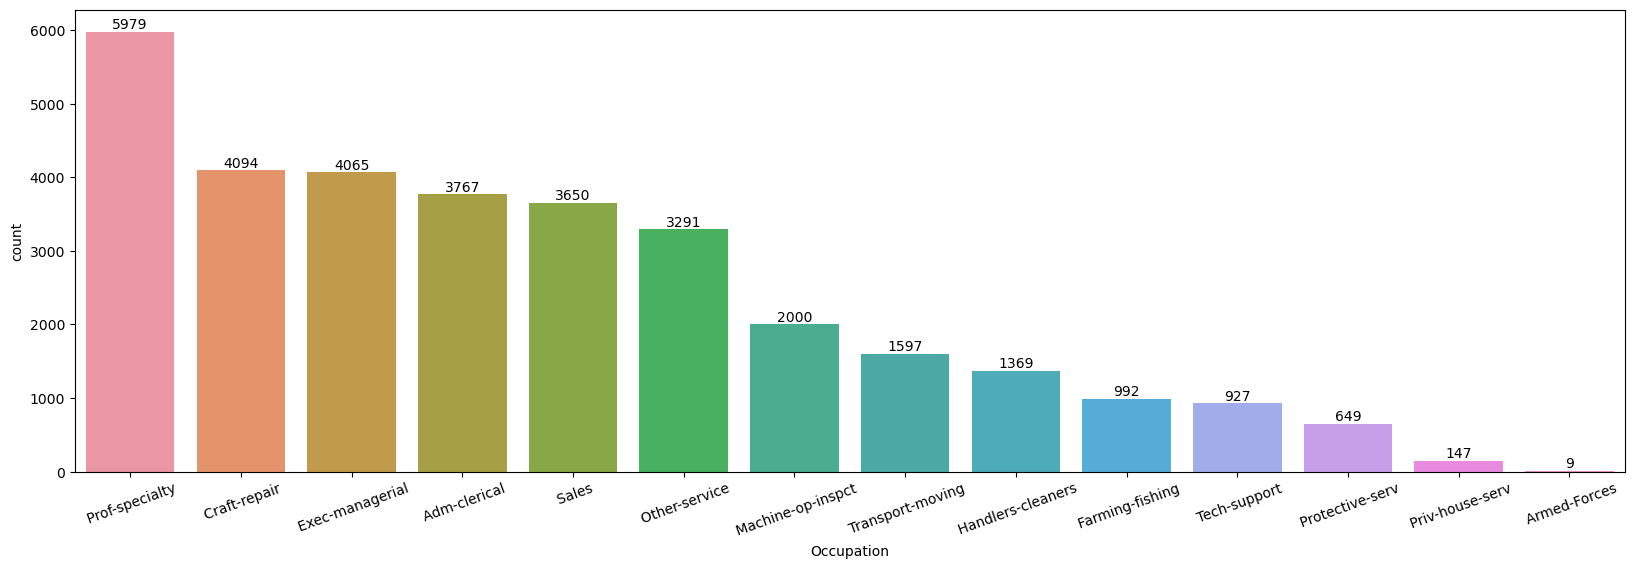

In [23]:
# Count the occurrences of each Occupation
counts = df['Occupation'].value_counts().sort_values(ascending=False)

# Plotting the countplot with bars in ascending order
plt.figure(figsize=(20, 6))
ax = sns.countplot(data=df, x='Occupation', order=counts.index)

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=20)    

1. **High Representation in Professional and Managerial Roles**: Occupations like Prof-specialty, Craft-repair, and Exec-managerial have the highest counts, indicating a significant representation of specialized professionals and managerial roles in the dataset.

2. **Moderate to Low Representation in Service and Manual Labor Roles**: Occupations such as Other-service, Machine-op-inspct, and Transport-moving have moderate counts, while roles like Handlers-cleaners, Farming-fishing, and Tech-support have relatively lower counts, showing less representation of manual and technical support roles.

3. **Minimal Representation in Armed Forces**: The Armed Forces category has the least representation, with only 9 individuals, highlighting its minimal presence in the dataset.

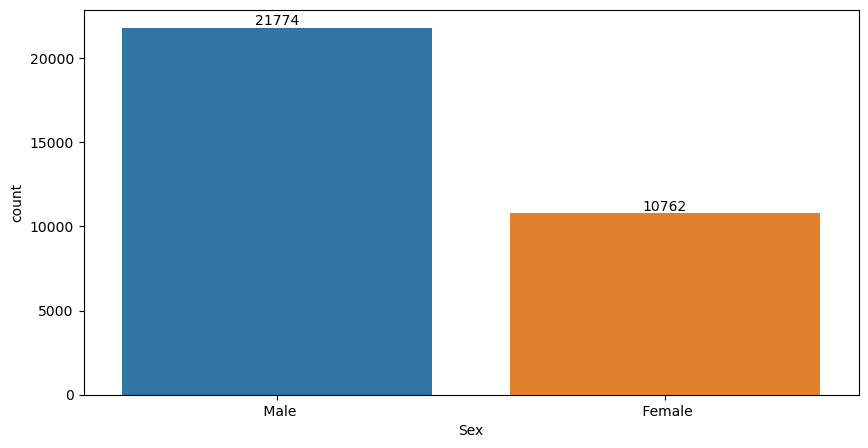

In [24]:
plt.figure(figsize=(10,5))
ax=sns.countplot(data=df,x='Sex')
for bar in ax.containers:
    ax.bar_label(bar)

- The dataset has a higher representation of males compared to females, with nearly double the number of males.
- This disparity might impact the analysis of income distribution and correlation with other features, as gender is a significant factor in income analysis.

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, ' Married-civ-spouse'),
  Text(1, 0, ' Never-married'),
  Text(2, 0, ' Divorced'),
  Text(3, 0, ' Separated'),
  Text(4, 0, ' Widowed'),
  Text(5, 0, ' Married-spouse-absent'),
  Text(6, 0, ' Married-AF-spouse')])

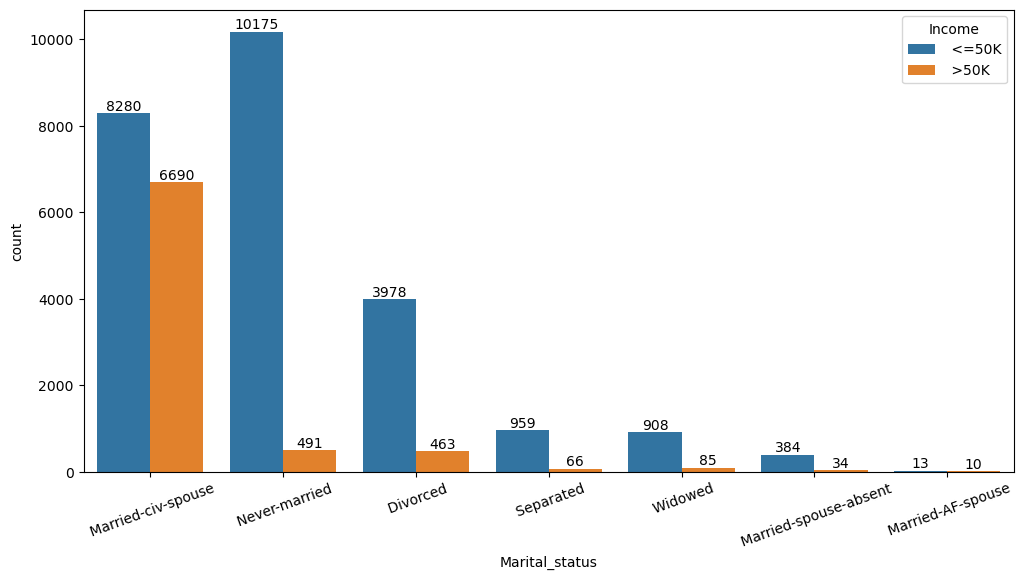

In [25]:
# Count the occurrences of each auto_make
counts = df['Marital_status'].value_counts().sort_values(ascending=False)

# Plotting the countplot with bars in ascending order
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Marital_status',hue='Income',order=counts.index)

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=20)    

- The majority of individuals in each marital status category earn <=50K.
- The highest concentration of individuals earning >50K is among those who are Married-civ-spouse.
- "Never-married" individuals have the highest total count but a very small proportion earn >50K.
- Categories such as "Separated," "Widowed," and "Married-spouse-absent" have relatively low counts for both income levels compared to "Married-civ-spouse" and "Never-married."

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, ' Husband'),
  Text(1, 0, ' Not-in-family'),
  Text(2, 0, ' Own-child'),
  Text(3, 0, ' Unmarried'),
  Text(4, 0, ' Wife'),
  Text(5, 0, ' Other-relative')])

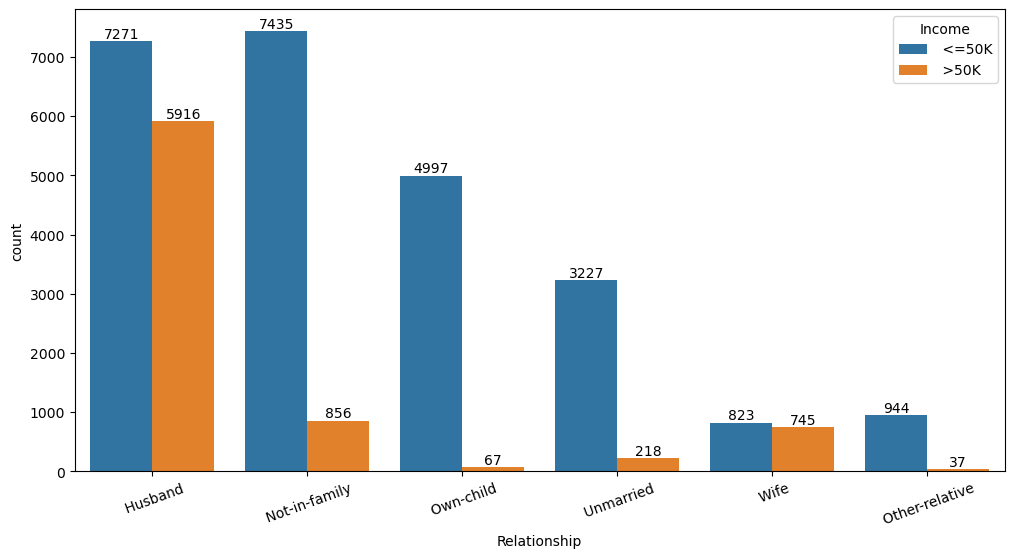

In [26]:
# Count the occurrences of each auto_make
counts = df['Relationship'].value_counts().sort_values(ascending=False)

# Plotting the countplot with bars in ascending order
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Relationship',hue='Income',order=counts.index)

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=20)  

- Husbands have a relatively high proportion of individuals earning >50K compared to other categories.
- The majority of individuals in the "Not-in-family" category earn <=50K, with very few earning >50K.
- The "Own-child" category predominantly consists of individuals earning <=50K, with a negligible number earning >50K.
- The "Wife" category shows a more balanced distribution between the two income levels compared to other categories.
- "Unmarried" and "Other-relative" categories have relatively low counts for both income levels, with a higher proportion earning <=50K.

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, ' White'),
  Text(1, 0, ' Black'),
  Text(2, 0, ' Asian-Pac-Islander'),
  Text(3, 0, ' Amer-Indian-Eskimo'),
  Text(4, 0, ' Other')])

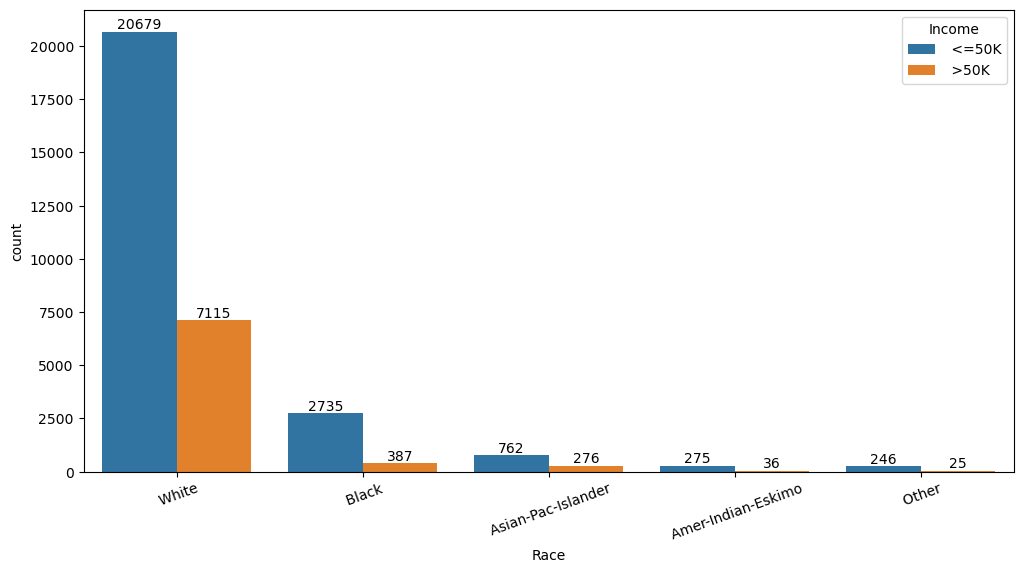

In [27]:
# Count the occurrences of each Race
counts = df['Race'].value_counts().sort_values(ascending=False)

# Plotting the countplot with bars in ascending order
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Race',hue='Income',order=counts.index)

# Add labels on top of the bars
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=20)  

- The "White" racial group has the highest counts for both income levels, with a substantial number of individuals earning >50K.
- The "Black" racial group has a high count for individuals earning <=50K, but a relatively smaller number earn >50K.
- "Asian-Pac-Islander" and "Amer-Indian-Eskimo" groups have fewer individuals overall, but the proportion of those earning >50K in the "Asian-Pac-Islander" group is relatively higher compared to the "Amer-Indian-Eskimo" group.
- The "Other" category has the lowest counts for both income levels, with a very small number earning >50K.

### Checking Statistical Summary

In [28]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32536.000000,3.253600e+04,32536.000000,32536.000000,32536.000000,32536.000000
mean,38.585536,1.897843e+05,10.081725,1078.410069,87.370912,40.440343
std,13.638193,1.055563e+05,2.571622,7388.068465,403.107737,12.347079
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.369932e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Based on the above statistical summary:
- Since the count is the same across all numerical columns, it indicates that there are no missing values in the dataset.
- The mean is greater than the median (50th percentile) for the columns 'Capital_gain','Capital_loss'and 'Hours_per_week indicating that these distributions are right-skewed.
- The columns Education_num	,Capital_gain, Capital_loss and Hours_per_weekhave high stander deviation .
- There is a significant difference between the maximum value and the 75th percentile for these columns, suggesting the presence of outliers.

### Checking Outliers

In [29]:
categorical_columns=df.loc[:,df.dtypes!='object']

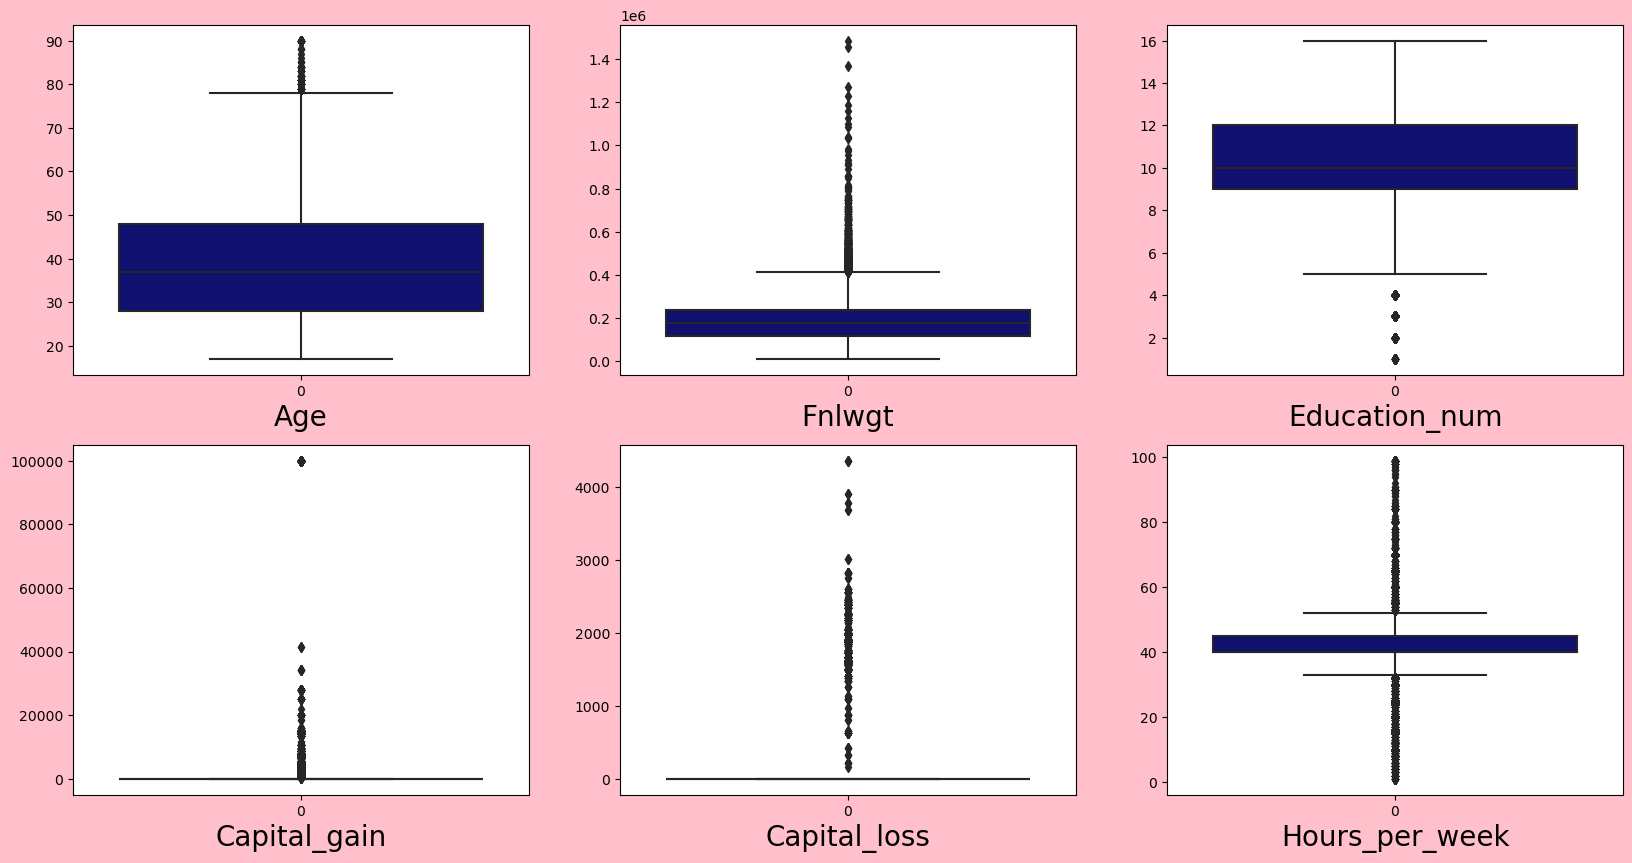

In [30]:
plt.figure(figsize=(20,10),facecolor='pink')
count=1
for i in categorical_columns.columns:
    if count<=10:
        ax=plt.subplot(2,3,count)
        sns.boxplot(df[i],color='navy')
        plt.xlabel(i,fontsize=20)
    count+=1

We can observed that the outliers is present in the data set but we will remove outliers

In [31]:
# Function to remove outliers based on IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# List of columns to clean
columns_to_clean = ['Age', 'Fnlwgt', 'Education_num',
       'Hours_per_week']

# Remove outliers from each column
for column in columns_to_clean:
    df = remove_outliers(df, column)
df.reset_index(drop=True, inplace=True)

### Performing Encoding

In [32]:
column_name=[col for col in df.columns if df[col].dtype=='object' ]
unique_values=[df[col].nunique() for col in column_name]

In [33]:
data_frame=pd.DataFrame({'col_name':column_name,
                        'value':unique_values})

In [34]:
data_frame.sort_values('value', ascending=False)

,col_name,value
7,Native_country,41
3,Occupation,14
1,Education,12
0,Workclass,8
2,Marital_status,7
4,Relationship,6
5,Race,5
6,Sex,2
8,Income,2


In [35]:
#importing Encoder label Encoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for column in column_name:
    df[column]=labelencoder.fit_transform(df[column])

In [36]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,38,3,215646,8,9,0,5,1,4,1,0,0,40,38,0
1,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
2,28,3,338409,6,13,2,9,5,2,0,0,0,40,4,0
3,37,3,284582,9,14,2,3,5,4,0,0,0,40,38,0
4,52,5,209642,8,9,2,3,0,4,1,0,0,45,38,1


### Checking Skewness

In [37]:
df.skew()

Age                0.407833
Workclass          0.027183
Fnlwgt             0.416170
Education         -0.778799
Education_num      0.249263
Marital_status     0.025464
Occupation         0.108440
Relationship       0.895983
Race              -2.387259
Sex               -0.786460
Capital_gain      12.662369
Capital_loss       4.455347
Hours_per_week     1.012744
Native_country    -4.608432
Income             1.072776
dtype: float64

In [38]:
#removing skewness by using cuberoot method
df['Hours_per_week']=np.cbrt(df['Hours_per_week'])

we removed skewness from numerical columns

In [39]:
df.skew()

Age                0.407833
Workclass          0.027183
Fnlwgt             0.416170
Education         -0.778799
Education_num      0.249263
Marital_status     0.025464
Occupation         0.108440
Relationship       0.895983
Race              -2.387259
Sex               -0.786460
Capital_gain      12.662369
Capital_loss       4.455347
Hours_per_week     0.883954
Native_country    -4.608432
Income             1.072776
dtype: float64

### Checking correlation between target variable and independent variables

In [40]:
corr_matrix=df.corr()
corr_matrix

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.018709,-0.064995,-0.006792,0.072918,-0.282246,-0.002478,-0.219569,0.027177,0.072182,0.087463,0.059755,0.053559,0.002605,0.266015
Workclass,0.018709,1.000000,-0.018382,-0.001375,-0.001159,-0.010414,0.011698,-0.043610,0.048141,0.057601,0.030816,-0.000589,0.057806,-0.002988,-0.008430
Fnlwgt,-0.064995,-0.018382,1.000000,-0.012333,-0.021993,0.029967,0.005759,0.002728,-0.007812,0.019514,-0.001293,-0.001676,-0.009851,-0.050273,0.001864
Education,-0.006792,-0.001375,-0.012333,1.000000,0.167102,-0.019487,-0.042588,0.009607,0.014753,-0.027967,0.016378,0.010714,0.018359,0.042661,0.032474
Education_num,0.072918,-0.001159,-0.021993,0.167102,1.000000,-0.028278,0.114320,-0.091881,0.030884,0.005476,0.110139,0.081851,0.145505,-0.007891,0.329065
Marital_status,-0.282246,-0.010414,0.029967,-0.019487,-0.028278,1.000000,0.031305,0.147821,-0.077682,-0.084334,-0.034690,-0.026137,-0.088146,-0.019925,-0.172794
Occupation,-0.002478,0.011698,0.005759,-0.042588,0.114320,0.031305,1.000000,-0.059227,-0.002863,0.073661,0.016267,0.016134,0.053201,-0.005113,0.054226
Relationship,-0.219569,-0.043610,0.002728,0.009607,-0.091881,0.147821,-0.059227,1.000000,-0.129351,-0.590027,-0.046981,-0.061982,-0.186199,-0.014527,-0.243856
Race,0.027177,0.048141,-0.007812,0.014753,0.030884,-0.077682,-0.002863,-0.129351,1.000000,0.102476,0.010985,0.022602,0.094844,0.136951,0.076552
Sex,0.072182,0.057601,0.019514,-0.027967,0.005476,-0.084334,0.073661,-0.590027,0.102476,1.000000,0.039190,0.049247,0.187149,0.009433,0.215674


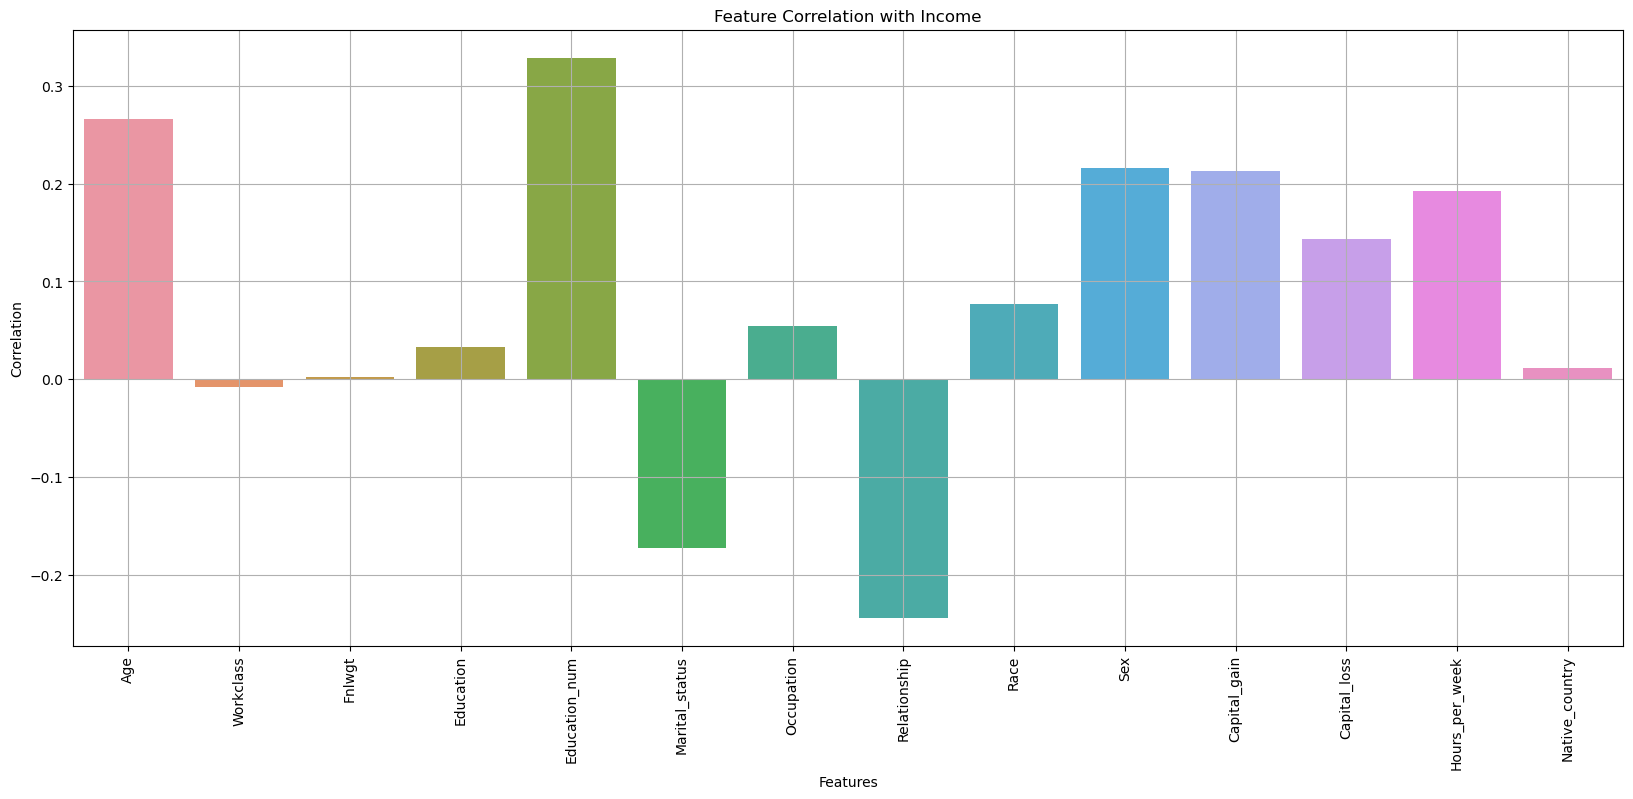

In [41]:
# Plot correlation with target variable
plt.figure(figsize=(20, 8))
sns.barplot(x=corr_matrix['Income'].drop('Income').index, y=corr_matrix['Income'].drop('Income').values)
plt.title("Feature Correlation with Income")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

1. **Positive Correlations**:
   - **Age**: There is a moderately positive correlation with income (~0.23). This suggests that as age increases, income tends to increase as well.
   - **Education_num**: This feature has the highest positive correlation with income (~0.33), indicating that higher levels of education are strongly associated with higher income.
   - **Occupation**: There is a positive correlation with income (~0.15). Different occupations have varying impacts on income.
   - **Race**: There is a slight positive correlation (~0.08).
   - **Sex**: There is a positive correlation with income (~0.22), suggesting that one gender (likely male) tends to have higher income.
   - **Capital_gain**: This feature has a significant positive correlation with income (~0.22), indicating that higher capital gains are associated with higher income.
   - **Capital_loss**: There is a moderately positive correlation with income (~0.15), suggesting that higher capital losses might be associated with higher income.
   - **Hours_per_week**: There is a positive correlation with income (~0.23), indicating that working more hours per week is associated with higher income.

2. **Negative Correlations**:
   - **Marital_status**: There is a strong negative correlation with income (~-0.2). This suggests that certain marital statuses are associated with lower income.
   - **Relationship**: This feature has the strongest negative correlation with income (~-0.25). Certain relationship statuses (like being unmarried) are strongly associated with lower income.
   - **Native_country**: There is a slight negative correlation (~-0.02), indicating that the country of origin has a minor impact on income.

3. **Near Zero Correlations**:
   - **Workclass** and **Fnlwgt** have correlations close to zero, indicating little to no linear relationship with income.

### Splitting the data into training and test

In [42]:
#seperating independent variable and target into x and y
x=df.drop('Income',axis=1)
y=df['Income']
print('Dimension of independent',x.shape)
print('Dimension of Target',y.shape)

Dimension of independent (21944, 14)
Dimension of Target (21944,)


### Feature Scaling using Standard Scalarization

In [43]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,-0.053693,-0.026933,0.403107,0.174366,-0.621537,-1.675676,-0.214088,-0.233779,0.399544,0.681324,-0.149235,-0.221626,-0.381593,0.239707
1,1.188382,-0.026933,0.622681,-2.377709,-1.529744,-0.336551,-0.214088,-0.856585,-1.927004,0.681324,-0.149235,-0.221626,-0.381593,0.239707
2,-0.881743,-0.026933,1.816246,-0.554798,1.194878,-0.336551,0.774849,2.257445,-1.927004,-1.467731,-0.149235,-0.221626,-0.381593,-5.659821
3,-0.136498,-0.026933,1.196637,0.538948,1.648981,-0.336551,-0.708556,2.257445,0.399544,-1.467731,-0.149235,-0.221626,-0.381593,0.239707
4,1.105577,1.742557,0.333994,0.174366,-0.621537,-0.336551,-0.708556,-0.856585,0.399544,0.681324,-0.149235,-0.221626,0.875365,0.239707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21939,-1.378573,-0.026933,1.490977,1.268112,-0.167433,1.002574,1.022083,-0.233779,0.399544,0.681324,-0.149235,-0.221626,-0.381593,0.239707
21940,-0.964548,-0.026933,0.882614,-1.283962,0.740774,-0.336551,1.516551,2.257445,0.399544,-1.467731,-0.149235,-0.221626,-0.913748,0.239707
21941,0.111917,-0.026933,-0.302202,0.174366,-0.621537,-0.336551,0.033146,-0.856585,0.399544,0.681324,-0.149235,-0.221626,-0.381593,0.239707
21942,1.602407,-0.026933,-0.330566,0.174366,-0.621537,2.341699,-1.450259,1.634639,0.399544,-1.467731,-0.149235,-0.221626,-0.381593,0.239707


### Checking Variance Inflation Factor(VIF)

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF
vif_data = {'Features': x.columns,
            'VIF Values': [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]}

vif = pd.DataFrame(vif_data)

# Display the VIF dataframe
print(vif)

          Features  VIF Values
0              Age    1.148132
1        Workclass    1.008676
2           Fnlwgt    1.008408
3        Education    1.036433
4    Education_num    1.096196
5   Marital_status    1.106237
6       Occupation    1.025401
7     Relationship    1.652038
8             Race    1.047704
9              Sex    1.575030
10    Capital_gain    1.024450
11    Capital_loss    1.015224
12  Hours_per_week    1.079063
13  Native_country    1.024180


### Performing PCA(Principal Component Analysis (PCA))

In [45]:
from sklearn.decomposition import PCA
pca=PCA(n_components=4) 
x=pca.fit_transform(x)

- We have scaled the data using the standard scaler method to ensure that all features contribute equally to the analysis, thus overcoming the issue of bias caused by varying scales of the features.
- We have used the PCA method to manage bias in the data by transforming the original features into a set of orthogonal components, which helps in reducing dimensionality and capturing the most important variance in the data

### Oversampling

In [46]:
#Oversampling the data
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

We used an oversampling method to address the class imbalance problem

### Model Selection

In [47]:
#Importing mode
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier #Random Forest Classifier and Extra Trees Classifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier #Gradient Boosting Classifier ,AdaBoost Classifier 
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbors Classifier

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
#find the best random State
max_accuracy=0
best_state=0
random_state=range(1,200)
for state in random_state:
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=state)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_accuracy:
        max_accuracy=acc
        best_state=state
print("Maximum accuracy_Score is=>",max_accuracy,"On Random State=>",best_state)

Maximum accuracy_Score is=> 0.7489427539969056 On Random State=> 130


In [50]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=best_state)

#### LogisticRegression

In [51]:
LG=LogisticRegression()
LG.fit(x_train,y_train)
pred_lg=LG.predict(x_test)
print(LG)
print('Accuracy Score:-',accuracy_score(y_test,pred_lg))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_lg))
print('Classification Report:-',classification_report(y_test,pred_lg))
print('---'*20)

LogisticRegression()
Accuracy Score:- 0.7489427539969056
Confusion Matrix:- [[3570 1262]
 [1172 3691]]
Classification Report:-               precision    recall  f1-score   support

           0       0.75      0.74      0.75      4832
           1       0.75      0.76      0.75      4863

    accuracy                           0.75      9695
   macro avg       0.75      0.75      0.75      9695
weighted avg       0.75      0.75      0.75      9695

------------------------------------------------------------


### ExtraTreesClassifier

In [52]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_etc=etc.predict(x_test)
print(etc)
print('Accuracy Score:-',accuracy_score(y_test,pred_etc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_etc))
print('Classification Report:-',classification_report(y_test,pred_etc))
print('---'*20)

ExtraTreesClassifier()
Accuracy Score:- 0.8498194945848375
Confusion Matrix:- [[3916  916]
 [ 540 4323]]
Classification Report:-               precision    recall  f1-score   support

           0       0.88      0.81      0.84      4832
           1       0.83      0.89      0.86      4863

    accuracy                           0.85      9695
   macro avg       0.85      0.85      0.85      9695
weighted avg       0.85      0.85      0.85      9695

------------------------------------------------------------


### DecisionTreeClassifier

In [53]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(dtc)
print('Accuracy Score:-',accuracy_score(y_test,pred_dtc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_dtc))
print('Classification Report:-',classification_report(y_test,pred_dtc))
print('---'*20)

DecisionTreeClassifier()
Accuracy Score:- 0.768231046931408
Confusion Matrix:- [[3625 1207]
 [1040 3823]]
Classification Report:-               precision    recall  f1-score   support

           0       0.78      0.75      0.76      4832
           1       0.76      0.79      0.77      4863

    accuracy                           0.77      9695
   macro avg       0.77      0.77      0.77      9695
weighted avg       0.77      0.77      0.77      9695

------------------------------------------------------------


### GradientBoostingClassifier

In [54]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print(gbc)
print('Accuracy Score:-',accuracy_score(y_test,pred_gbc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_gbc))
print('Classification Report:-',classification_report(y_test,pred_gbc))
print('---'*20)

GradientBoostingClassifier()
Accuracy Score:- 0.7862815884476534
Confusion Matrix:- [[3564 1268]
 [ 804 4059]]
Classification Report:-               precision    recall  f1-score   support

           0       0.82      0.74      0.77      4832
           1       0.76      0.83      0.80      4863

    accuracy                           0.79      9695
   macro avg       0.79      0.79      0.79      9695
weighted avg       0.79      0.79      0.79      9695

------------------------------------------------------------


### AdaBoostClassifier

In [55]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print(abc)
print('Accuracy Score:-',accuracy_score(y_test,pred_abc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_abc))
print('Classification Report:-',classification_report(y_test,pred_abc))
print('---'*20)

AdaBoostClassifier()
Accuracy Score:- 0.762867457452295
Confusion Matrix:- [[3563 1269]
 [1030 3833]]
Classification Report:-               precision    recall  f1-score   support

           0       0.78      0.74      0.76      4832
           1       0.75      0.79      0.77      4863

    accuracy                           0.76      9695
   macro avg       0.76      0.76      0.76      9695
weighted avg       0.76      0.76      0.76      9695

------------------------------------------------------------


#### RandomForestClassifier 

In [56]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print(rfc)
print('Accuracy Score:-',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_rfc))
print('Classification Report:-',classification_report(y_test,pred_rfc))
print('---'*20)

RandomForestClassifier()
Accuracy Score:- 0.835069623517277
Confusion Matrix:- [[3838  994]
 [ 605 4258]]
Classification Report:-               precision    recall  f1-score   support

           0       0.86      0.79      0.83      4832
           1       0.81      0.88      0.84      4863

    accuracy                           0.84      9695
   macro avg       0.84      0.83      0.83      9695
weighted avg       0.84      0.84      0.83      9695

------------------------------------------------------------


#### KNeighborsClassifier

In [57]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(knn)
print('Accuracy Score:-',accuracy_score(y_test,pred_knn))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_knn))
print('Classification Report:-',classification_report(y_test,pred_knn))
print('---'*20)

KNeighborsClassifier()
Accuracy Score:- 0.8179473955647241
Confusion Matrix:- [[3576 1256]
 [ 509 4354]]
Classification Report:-               precision    recall  f1-score   support

           0       0.88      0.74      0.80      4832
           1       0.78      0.90      0.83      4863

    accuracy                           0.82      9695
   macro avg       0.83      0.82      0.82      9695
weighted avg       0.83      0.82      0.82      9695

------------------------------------------------------------


#### SVC

In [58]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(svc)
print('Accuracy Score:-',accuracy_score(y_test,pred_svc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_svc))
print('Classification Report:-',classification_report(y_test,pred_svc))
print('---'*20)

SVC()
Accuracy Score:- 0.7822588963383187
Confusion Matrix:- [[3351 1481]
 [ 630 4233]]
Classification Report:-               precision    recall  f1-score   support

           0       0.84      0.69      0.76      4832
           1       0.74      0.87      0.80      4863

    accuracy                           0.78      9695
   macro avg       0.79      0.78      0.78      9695
weighted avg       0.79      0.78      0.78      9695

------------------------------------------------------------


### Cross Validation Score

In [59]:
from sklearn.model_selection import cross_val_score

#### LogisticRegression

In [60]:
score=cross_val_score(LG,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_lg)-score.mean())*100)

[0.78537252 0.7874231  0.79220779 0.78947368 0.80378304]
0.7916520293025595
Difference between accuracy score and cross validation score is: -4.270927530565394


#### ExtraTreesClassifier

In [61]:
score1=cross_val_score(etc,x,y)
print(score1)
print(score1.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_etc)-score1.mean())*100)

[0.78286626 0.789018   0.78947368 0.79106858 0.79740201]
0.789965705263407
Difference between accuracy score and cross validation score is: 5.985378932143048


#### DecisionTreeClassifier

In [62]:
score2=cross_val_score(dtc,x,y)
print(score2)
print(score2.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_dtc)-score2.mean())*100)

[0.74641148 0.73729779 0.74025974 0.73501937 0.74407475]
0.7406126258714658
Difference between accuracy score and cross validation score is: 2.7618421059942166


#### GradientBoostingClassifier

In [63]:
score3=cross_val_score(gbc,x,y)
print(score3)
print(score3.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_gbc)-score3.mean())*100)

[0.79220779 0.80291638 0.80200501 0.79767601 0.8094804 ]
0.8008571191798174
Difference between accuracy score and cross validation score is: -1.4575530732164


#### AdaBoostClassifier

In [64]:
score4=cross_val_score(abc,x,y)
print(score4)
print(score4.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_abc)-score4.mean())*100)

[0.78081568 0.79380269 0.78833447 0.79152427 0.80355515]
0.7916064504511466
Difference between accuracy score and cross validation score is: -2.873899299885163


#### RandomForestClassifier

In [65]:
score5=cross_val_score(rfc,x,y)
print(score5)
print(score5.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_rfc)-score5.mean())*100)

[0.78628389 0.79243563 0.79084074 0.79357485 0.79580675]
0.791788371234708
Difference between accuracy score and cross validation score is: 4.328125228256896


#### KNeighborsClassifier

In [66]:
score6=cross_val_score(knn,x,y)
print(score6)
print(score6.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_knn)-score6.mean())*100)

[0.77899294 0.78013215 0.77580314 0.78172704 0.78851413]
0.7810338807987898
Difference between accuracy score and cross validation score is: 3.6913514765934297


#### SVC

In [67]:
score7=cross_val_score(svc,x,y)
print(score7)
print(score7.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_svc)-score7.mean())*100)

[0.79084074 0.79767601 0.80177717 0.80405559 0.80925251]
0.8007204033951624
Difference between accuracy score and cross validation score is: -1.8461507056843685


- The KNeighborsClassifier seems to perform relatively well among the models tested, as it has a high mean cross-validation score and a small difference between accuracy score and cross-validation score
- KNeighborsClassifier is our best fitting and best performing model

### Hyper Parameter Tuning

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
param_grid = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree'],
    'leaf_size': [20, 30, 40],
    'p': [1, 2, 3]
}

In [71]:
GSCV=GridSearchCV(knn,param_grid,cv=5)

In [72]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree'],
                         'leaf_size': [20, 30, 40], 'n_neighbors': [3, 5, 7],
                         'p': [1, 2, 3], 'weights': ['uniform', 'distance']})

In [73]:
GSCV.best_params_

{'algorithm': 'auto',
 'leaf_size': 20,
 'n_neighbors': 3,
 'p': 2,
 'weights': 'distance'}

In [74]:
best_model=KNeighborsClassifier(n_neighbors=3,weights='distance',algorithm='auto',leaf_size=20,p=2)
best_model.fit(x_train,y_train)
pred_=best_model.predict(x_test)
acc=accuracy_score(y_test,pred_)
print(acc*100)

84.10520887055183


#### By adding parameter my model give 84.10 % accuracy

### Plotting AUC ROC curve

In [75]:
from sklearn.metrics import roc_curve,auc,roc_auc_score,precision_recall_curve
from sklearn import metrics

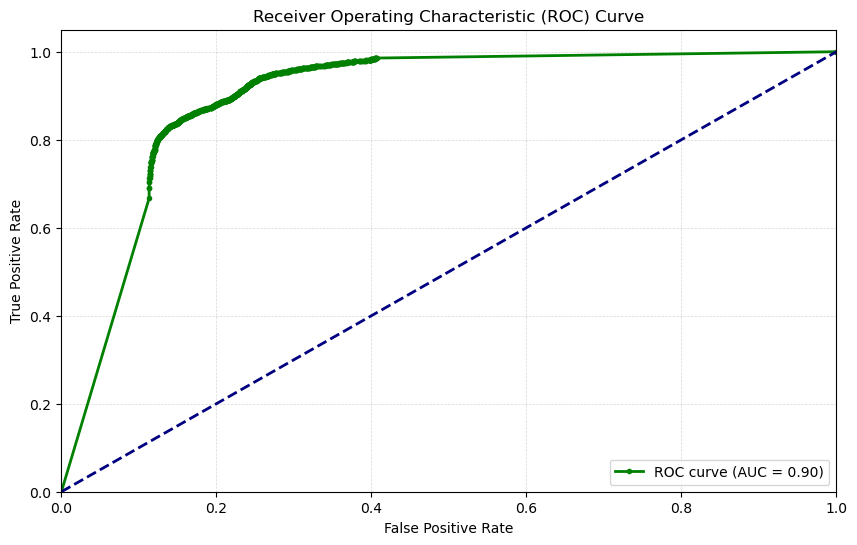

In [76]:
# Calculate probabilities for the positive class
y_prob = best_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})', marker='o', markersize=3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

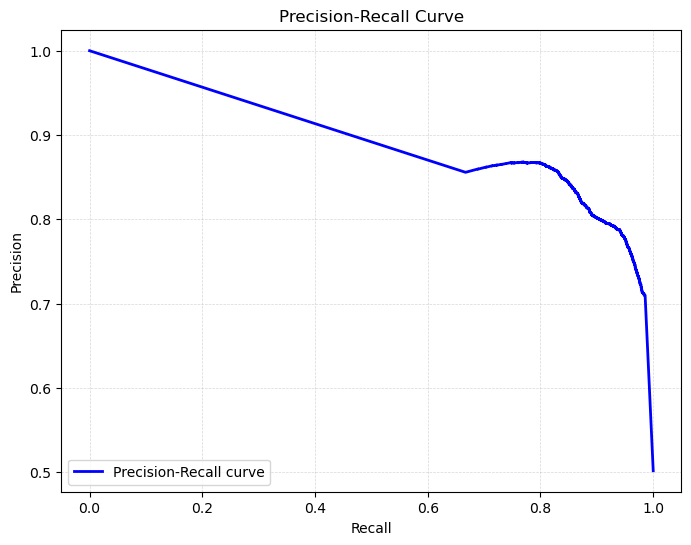

In [77]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

#### Saving the Model

In [78]:
#importing joblib and saving model
import joblib
joblib.dump(best_model,"Census Income project.pkl")

['Census Income project.pkl']

In [79]:
#Now loading file and checcking prediction 
model=joblib.load("Census Income project.pkl")

In [80]:
prediction=model.predict(x_test)
prediction

array([1, 1, 0, ..., 1, 0, 0])

In [81]:
Original=np.array(y_test)
df=pd.DataFrame()
df['Original']=Original
df['prediction']=prediction
df.tail(10)

,Original,prediction
9685,1,1
9686,1,0
9687,0,1
9688,1,1
9689,1,1
9690,1,1
9691,0,0
9692,0,1
9693,0,0
9694,0,0
